# Medical Cost Personal 


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
insurance=pd.read_csv('/Users/ortal/Desktop/OneDrive - Ariel University/שיעורים/AI/proiect/dataset/insurance.csv')
insurance.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Explanation of the  features: 
**age**- the age in years\
**bmi**-Body mass index (BMI) is an approximate measure of the total body fat.
 It is calculated by dividing the weight in kilograms by the height in metres squared (m^2). The ideal bmi is 18.5 to 24.9.
**children**- Number of children covered by health insurance / Number of dependents
**region**- this data is about USA, so there is  4 kind of region (:
* Southwest
* southeast
* northwest
* northeast

**charge**- Individual medical costs billed by health insurance

In [120]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [121]:
insurance["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

/Users/ortal/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


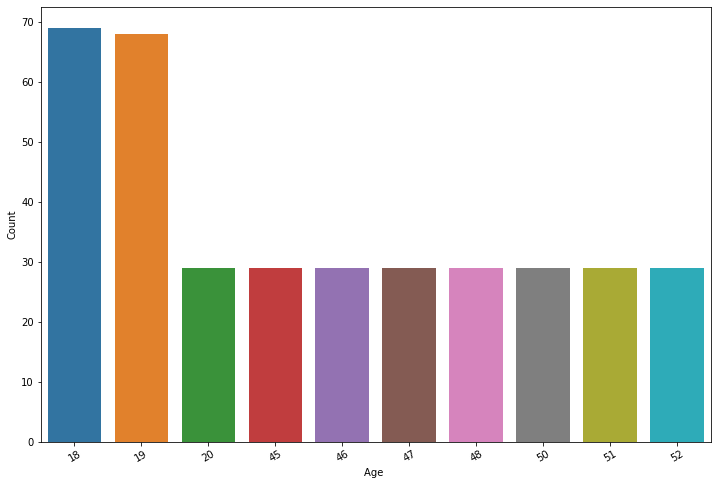

In [122]:
age_ = insurance['age'].value_counts().head(10)
plt.figure(figsize=(12,8))
_ = sns.barplot(age_.index, age_.values)
plt.xlabel("Age ")
plt.ylabel("Count")
for item in _.get_xticklabels():
    item.set_rotation(30)
plt.show()

In [123]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### accordind to this describe:
- Age is between 18 and 64 years. The mean age is 39.
- BMI is between 15.96 and 53.13. The mean bmi is 30.66.
- The numbers of children are between 0 and 5. The mean number of children is 1.09.
- Charges are between 1121.87₪ and 63770.43₪ The mean charges are 13,270.42₪

In [124]:
#dms = pd.get_dummies(df[['sex', 'smoker', 'region']])
#change female=0, male=1
insurance['sex_code']=pd.factorize(insurance.sex)[0]
#change yes=0, no=1
insurance['smoker_code']=pd.factorize(insurance.smoker)[0]
#change southwest=0, southeast=1,northwest=2,northeast=3
insurance['region_code']=pd.factorize(insurance.region)[0]

insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_code,smoker_code,region_code
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


lets see an histogram of bmi per gender:

<Figure size 864x576 with 0 Axes>

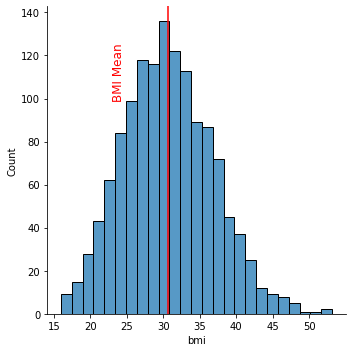

In [125]:
#sns.displot(data=insurance, x="bmi", col="sex",kde=True )
#distribution of BMI - body mass index. Red line is mean
plt.figure(figsize=(12,8));
sns.displot(insurance['bmi'])
plt.axvline(insurance["bmi"].mean(), c="r")
plt.text(23,100,'BMI Mean',rotation=90, size ="large", c="r");

In [126]:
insurance.groupby('sex').charges.mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

we can see that the insurance for male is higher than for female


In [127]:
insurance.groupby('smoker').charges.mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

unsuprisely, we can see that the insurance for smokers is higher than for non-smokers

smoker
no     1064
yes     274
Name: charges, dtype: int64

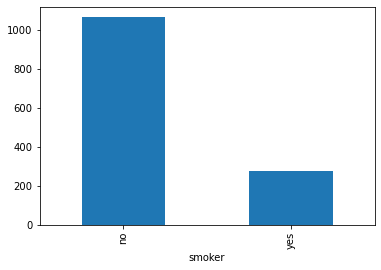

In [128]:
smokers=insurance.groupby('smoker').charges.count()
smokers.plot(kind='bar')
smokers

there is more non-smokers than smokers

sex     smoker
female  no         8762.297300
        yes       30678.996276
male    no         8087.204731
        yes       33042.005975
Name: charges, dtype: float64

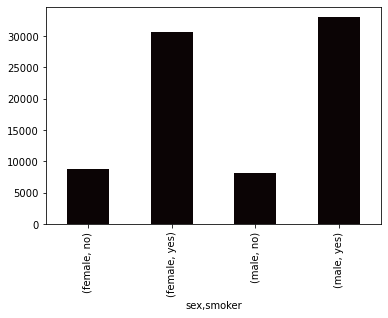

In [129]:
sex_smoker=insurance.groupby(['sex', 'smoker']).charges.mean()
sex_smoker.plot(kind='bar', colormap='mako')
sex_smoker

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

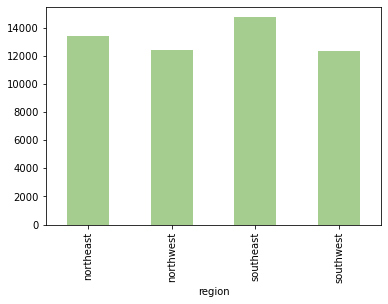

In [130]:
region_=insurance.groupby('region').charges.mean()
region_.plot(kind='bar', colormap='crest')
region_

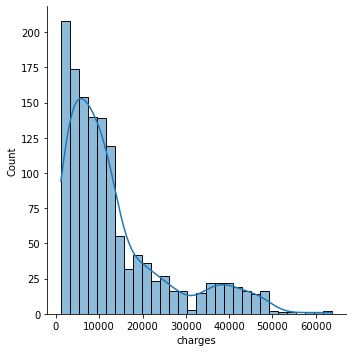

In [131]:
sns.displot(data=insurance, x="charges", kde=True )

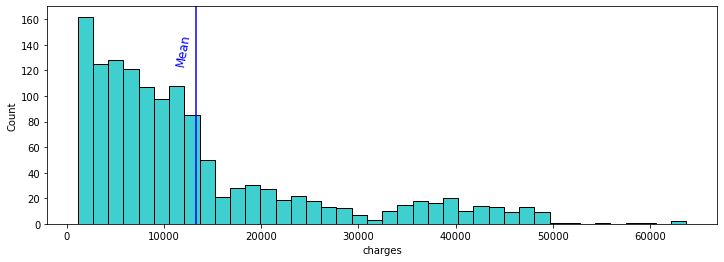

In [132]:
#distribution of "charges"(how much is paid for insurance). red line is mean or an average.
plt.figure(figsize=(12,4))
sns.histplot(insurance['charges'],kde=False,bins=40,color='c')
plt.axvline(insurance["charges"].mean(), c="blue")
plt.text(11000,125,'Mean',rotation=80, size ="large", c="blue");

lets drop the columns with the original data that we change to "code":

In [133]:
insurance.drop(['sex','smoker', 'region'],axis=1 ,inplace = True)
insurance.head()

,age,bmi,children,charges,sex_code,smoker_code,region_code
0,19,27.900,0,16884.92400,0,0,0
1,18,33.770,1,1725.55230,1,1,1
2,28,33.000,3,4449.46200,1,1,1
3,33,22.705,0,21984.47061,1,1,2
4,32,28.880,0,3866.85520,1,1,2


Text(0.5, 1.0, 'Correlation between facial features')

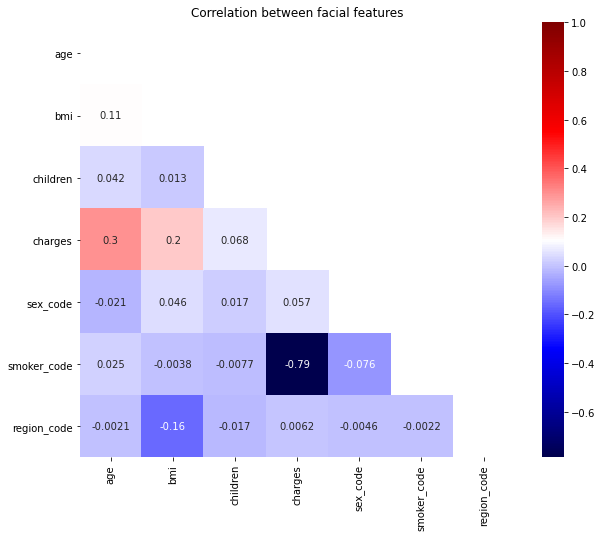

In [143]:
mask = np.zeros_like(insurance.corr())
mask[np.tril_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance.corr()
sns.heatmap(corr, vmax=1,annot=True,cmap='seismic', mask=mask.T,square=True)

plt.title('Correlation between facial features')

* we can see that there is low corolation between charges and smoking : -0.79  its mean that the cost go higher if you smoke.\
* the corollation between bmi and charges dont loock right. lets split it:


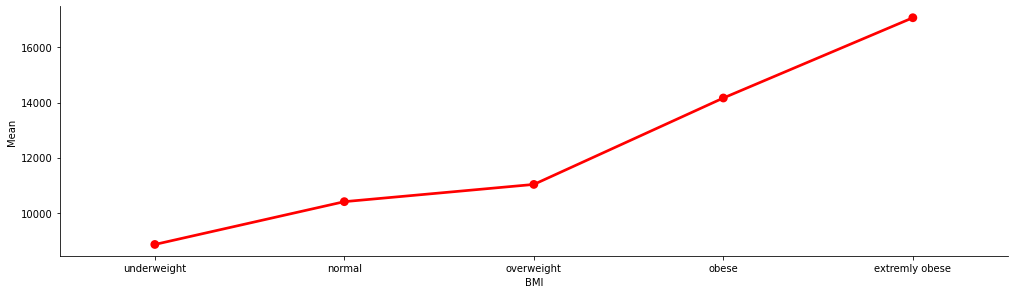

In [165]:
underweight=insurance[insurance["bmi"]<18.5]["charges"].mean()
normal=insurance[(insurance['bmi'] > 18.5) & (insurance['bmi'] < 24.9)]["charges"].mean()
overweight=insurance[(insurance['bmi'] > 24.9) & (insurance['bmi'] < 29.9)]["charges"].mean()
obese=insurance[(insurance['bmi'] > 29.9) & (insurance['bmi'] < 34.9)]["charges"].mean()
extremly_obese=insurance[insurance["bmi"]>34.9]["charges"].mean()
bmi_category=["underweight","normal","overweight","obese","extremly obese"]
list_mean=[underweight,normal,overweight,obese,extremly_obese]
d={'BMI':bmi_category,'Mean':list_mean}    
bmi_frame=pd.DataFrame(d)
bmi_frame

sns.catplot(x='BMI',y='Mean',data=bmi_frame,kind='point',height=4,aspect=3.5, color='r')
 

we can see that the insurance for poeple with highe or very high bmi is more expensive than people with low bmi/

<AxesSubplot:xlabel='charges', ylabel='bmi'>

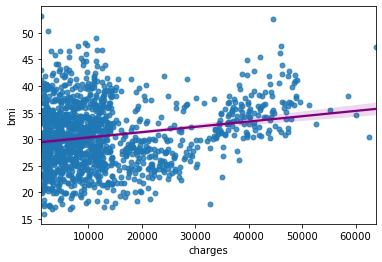

In [171]:
#there is some positive correlation between increased BMI and amount of money that you will pay for health insruance
sns.regplot(x='charges',y='bmi',data=insurance,scatter_kws={"alpha":0.8,"s": 24}, line_kws={"color":"purple"})
